- **Student name:** Natalia Edelson
- **Student pace:** Flex
- **Scheduled project review date/time:** 05/22/23 at 10am
- **Instructor name:** Morgan Jones

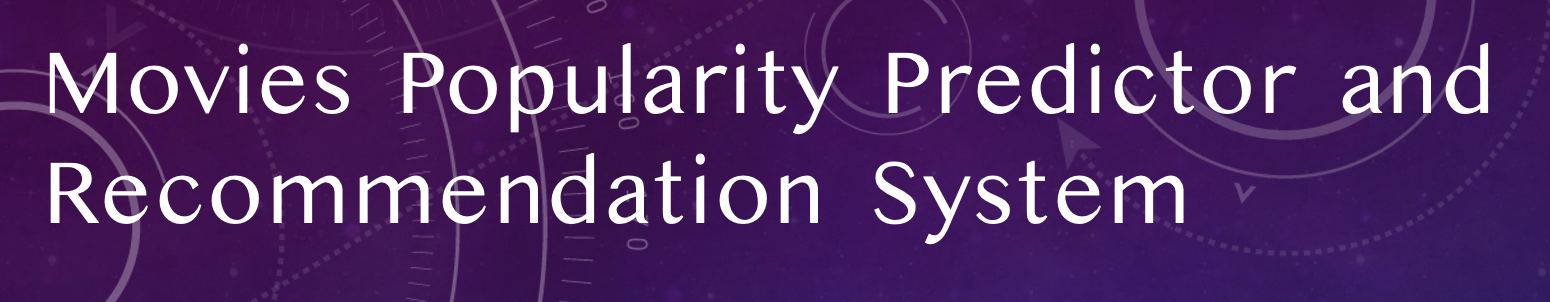

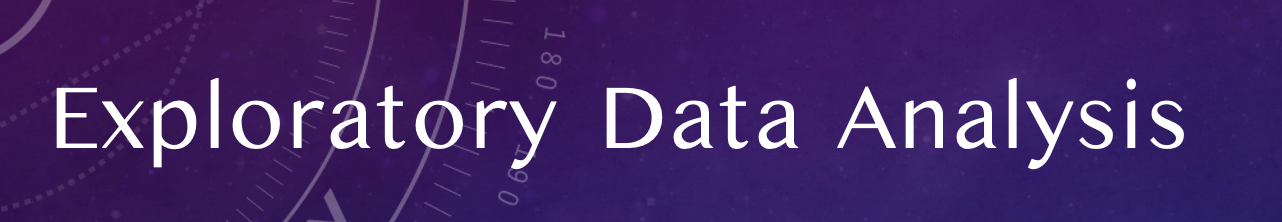

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importing-Libraries" data-toc-modified-id="Importing-Libraries-1">Importing Libraries</a></span></li><li><span><a href="#Data" data-toc-modified-id="Data-2">Data</a></span></li><li><span><a href="#Target-Variable,-Popularity" data-toc-modified-id="Target-Variable,-Popularity-3">Target Variable, Popularity</a></span><ul class="toc-item"><li><span><a href="#Distribution-of-other-continuous-variables" data-toc-modified-id="Distribution-of-other-continuous-variables-3.1">Distribution of other continuous variables</a></span></li></ul></li><li><span><a href="#Popular-Movies" data-toc-modified-id="Popular-Movies-4">Popular Movies</a></span><ul class="toc-item"><li><span><a href="#Top-50,-most-popular-movies" data-toc-modified-id="Top-50,-most-popular-movies-4.1">Top 50, most popular movies</a></span></li></ul></li><li><span><a href="#Budget" data-toc-modified-id="Budget-5">Budget</a></span></li><li><span><a href="#Languages" data-toc-modified-id="Languages-6">Languages</a></span></li><li><span><a href="#Years" data-toc-modified-id="Years-7">Years</a></span></li><li><span><a href="#Release-Date-and-Popularity" data-toc-modified-id="Release-Date-and-Popularity-8">Release Date and Popularity</a></span></li><li><span><a href="#Correlation" data-toc-modified-id="Correlation-9">Correlation</a></span><ul class="toc-item"><li><span><a href="#Genres" data-toc-modified-id="Genres-9.1">Genres</a></span></li></ul></li><li><span><a href="#Production-Companies" data-toc-modified-id="Production-Companies-10">Production Companies</a></span><ul class="toc-item"><li><span><a href="#Top-Popular-Productions" data-toc-modified-id="Top-Popular-Productions-10.1">Top Popular Productions</a></span></li></ul></li><li><span><a href="#Cast-&amp;-Popularity" data-toc-modified-id="Cast-&amp;-Popularity-11">Cast &amp; Popularity</a></span></li></ul></div>

**Business Goal for Spectrum's Growth in the Online Streaming Industry:** Utilize data science to predict movie popularity and enhance user experience, propelling Spectrum's success in the transition from cable to online streaming.

### Importing Libraries 

In [1]:
import pandas as pd
import numpy as np

# Plotly
import plotly.express as px
import plotly.graph_objects as go
import plotly.colors
import plotly.figure_factory as ff
import plotly.io as pio

from tqdm.notebook import tqdm
tqdm.pandas()

/Users/nataliaedelson/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


### Data

We collected two datasets from Kaggle https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata and also scraped our own data from The IMDB API. By merging these three databases, we obtained a comprehensive dataset that spans from Years 1916 - 2017.

In [2]:
# Reading the csv file 

tmdb_5000_cred = pd.read_csv('tmdb_5000_credits.csv', 
                                    index_col=False)

# Displaying the first few rows
tmdb_5000_cred.head()

movie_id                                     title  \
0     19995                                    Avatar   
1       285  Pirates of the Caribbean: At World's End   
2    206647                                   Spectre   
3     49026                     The Dark Knight Rises   
4     49529                               John Carter   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   
2  [{"cast_id": 1, "character": "James Bond", "cr...   
3  [{"cast_id": 2, "character": "Bruce Wayne / Ba...   
4  [{"cast_id": 5, "character": "John Carter", "c...   

                                                crew  
0  [{"credit_id": "52fe48009251416c750aca23", "de...  
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...  
2  [{"credit_id": "54805967c3a36829b5002c41", "de...  
3  [{"credit_id": "52fe4781c3a36847f81398c3", "de...  
4  [{"credit_id": "52fe479ac3a36847f813eaa3", "de...

In [3]:
# Checking the data
tmdb_5000_cred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


The DataFrame contains no missing values, as indicated by the "Non-Null Count" column. All 4803 entries in each column have values present. This means that there are no empty or null values in the 'movie_id', 'title', 'cast', and 'crew' columns. The absence of missing values ensures the integrity and completeness of the data for further analysis and processing.

In [4]:
# Reading the csv file 
tmdb_5000_mov = pd.read_csv('tmdb_5000_movies.csv',index_col=False)
# Displaying the first few rows
tmdb_5000_mov.head()

budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "name": "spy"}, {"id": 818, "name...                en   
3  [{"id": 849, "name": "dc comics"}, {"id": 853,...                en   
4  [{"id": 818, "name": "based on novel"}, {"id":...                en   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   
2  A cryptic message from Bond’s past sends him o...  107.376788   
3  Following the death of District Attorney Harve...  112.312950   
4  John Carter is a war-weary, former military ca...   43.926995   

                                production_companies  \
0  [{"name": "Ingenious Film Partners", "id": 289...   
1  [{"name": "Walt Disney Pictures", "id": 2}, {"...   
2  [{"name": "Columbia Pictures", "id": 5}, {"nam...   
3  [{"name": "Legendary Pictures", "id": 923}, {"...   
4        [{"name": "Walt Disney Pictures", "id": 2}]   

                                production_countries release_date     revenue  \
0  [{"iso_3166_1": "US", "name": "United States o...   2009-12-10  2787965087   
1  [{"iso_3166_1": "US", "name": "United States o...   2007-05-19   961000000   
2  [{"iso_3166_1": "GB", "name": "United Kingdom"...   2015-10-26   880674609   
3  [{"iso_3166_1": "US", "name": "United States o...   2012-07-16  1084939099   
4  [{"iso_3166_1": "US", "name": "United States o...   2012-03-07   284139100   

   runtime                                   spoken_languages    status  \
0    162.0  [{"iso_639_1": "en", "name": "English"}, {"iso...  Released   
1    169.0           [{"iso_639_1": "en", "name": "English"}]  Released   
2    148.0  [{"iso_639_1": "fr", "name": "Fran\u00e7ais"},...  Released   
3    165.0           [{"iso_639_1": "en", "name": "English"}]  Released   
4    132.0           [{"iso_639_1": "en", "name": "English"}]  Released   

                                          tagline  \
0                     Enter the World of Pandora.   
1  At the end of the world, the adventure begins.   
2                           A Plan No One Escapes   
3                                 The Legend Ends   
4            Lost in our world, found in another.   

                                      title  vote_average  vote_count  
0                                    Avatar           7.2       11800  
1  Pirates of the Caribbean: At World's End           6.9        4500  
2                                   Spectre           6.3        4466  
3                     The Dark Knight Rises           7.6        9106  
4                               John Carter           6.1        2124

In [5]:
# Checking the data 
tmdb_5000_mov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

The DataFrame has 4803 entries and 20 columns, containing information such as budget, genres, popularity, production companies, and more. Some columns have missing values.

In [6]:
# Mergeing the two datasets
tmdb_5000_cred.columns = ['id','tittle','cast','crew']
tmdb_5000_mov = tmdb_5000_mov.merge(tmdb_5000_cred,on='id')

In [7]:
# Checking it was merged
full_tmdb_5000_mov = tmdb_5000_mov
tmdb_5000_mov.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

We will remove the null values when cleaning the data and also eliminate the columns that are not relevant for our analysis, such as: 'budget', 'genres','popularity','original_language','runtime','vote_average','vote_count','release_date'.

In [8]:
vote_average_range = (tmdb_5000_mov['vote_average'].min(), tmdb_5000_mov['vote_average'].max())
vote_count_range = (tmdb_5000_mov['vote_count'].min(), tmdb_5000_mov['vote_count'].max())

print("Vote Average Range:", vote_average_range)
print("Vote Count Range:", vote_count_range)

Vote Average Range: (0.0, 10.0)
Vote Count Range: (0, 13752)


### Target Variable, Popularity



The popularity score in the TMDB dataset represents the level of interest and engagement with movies based on the behavior of IMDb users. It  ranges from 0 to 1000, with higher scores indicating higher popularity. This score provides insights into the movies that people are interested in, as it is derived from the actual behavior and preferences.

In [9]:
# Create a histogram of popularity
fig = px.histogram(tmdb_5000_mov, x='popularity', 
                   nbins=60, title='Distribution of Popularity')
fig.update_layout(xaxis_title='Popularity', 
                  yaxis_title='Count')
fig.show()

In [10]:
# Check the stats
tmdb_5000_mov.describe()

budget             id   popularity       revenue      runtime  \
count  4.803000e+03    4803.000000  4803.000000  4.803000e+03  4801.000000   
mean   2.904504e+07   57165.484281    21.492301  8.226064e+07   106.875859   
std    4.072239e+07   88694.614033    31.816650  1.628571e+08    22.611935   
min    0.000000e+00       5.000000     0.000000  0.000000e+00     0.000000   
25%    7.900000e+05    9014.500000     4.668070  0.000000e+00    94.000000   
50%    1.500000e+07   14629.000000    12.921594  1.917000e+07   103.000000   
75%    4.000000e+07   58610.500000    28.313505  9.291719e+07   118.000000   
max    3.800000e+08  459488.000000   875.581305  2.787965e+09   338.000000   

       vote_average    vote_count  
count   4803.000000   4803.000000  
mean       6.092172    690.217989  
std        1.194612   1234.585891  
min        0.000000      0.000000  
25%        5.600000     54.000000  
50%        6.200000    235.000000  
75%        6.800000    737.000000  
max       10.000000  13752.000000

In [11]:
# Creating a violin plot of popularity

fig = px.violin(tmdb_5000_mov, y='popularity', 
                box=True, title='Distribution of Popularity')

fig.update_layout(yaxis_title='Popularity')

fig.show()

* The average popularity score is 21.49.

* The standard deviation of 31.82 suggesting a fairly wide range of popularity scores among the movies.

* The minimum popularity score is 0, which could indicate that some movies in the dataset have very low or no popularity.

* The maximum popularity score is 875.58, indicating a highly popular movie. We will examine these because htese might be outliers.

* The 25th percentile value is 4.67, while the 75th percentile is 28.31, suggesting that the majority of movies have a popularity score within this range.

* The median popularity score is 12.92(middle value)

#### Distribution of other continuous variables


vote_average: Represents the average score given to a movie by users or viewers. Scaling from 0 to 10 or a star rating system. The vote_average value indicates the overall score that a movie has received based on user ratings.

vote_count: Represents the number of votes or ratings received by a movie. It indicates the total count of votes or ratings that have been submitted for a particular movie. The vote_count suggessts an indication of some level of engagement a movie has received from the audience.

Let's plot histograms  for the continious variables and see what they are normally distributed or not.

In [12]:
# Plotting

def plot_histogram(df, column):

    fig = go.Figure(data=[go.Histogram(x=df[column])])
    fig.update_layout(title_text='Histogram of '+column, 
                      xaxis_title=column,
                      yaxis_title='Count')
    fig.show()

# Call the function for each column
plot_histogram(tmdb_5000_mov, 'budget')
plot_histogram(tmdb_5000_mov, 'runtime')
plot_histogram(tmdb_5000_mov, 'vote_average')
plot_histogram(tmdb_5000_mov, 'vote_count')

### Popular Movies  

In [13]:
# Let's look at the movies that are above 200 popularity 

# Filter movies with popularity above 200
popular_movies = tmdb_5000_mov[tmdb_5000_mov['popularity'] > 200]

# Sort the popular movies in ascending order based on popularity
popular_movies_sorted = popular_movies.sort_values(by='popularity',
                                                   ascending=False)

# Display the sorted popular movies as a DataFrame
popular_movies_sorted[['title', 'popularity']]

title  popularity
546                                            Minions  875.581305
95                                        Interstellar  724.247784
788                                           Deadpool  514.569956
94                             Guardians of the Galaxy  481.098624
127                                 Mad Max: Fury Road  434.278564
28                                      Jurassic World  418.708552
199  Pirates of the Caribbean: The Curse of the Bla...  271.972889
82                      Dawn of the Planet of the Apes  243.791743
200              The Hunger Games: Mockingjay - Part 1  206.227151
88                                          Big Hero 6  203.734590
108                                 Terminator Genisys  202.042635

#### Top 50, most popular movies 

In [14]:

# Top 10 most popular movies
top_popularity = tmdb_5000_mov.sort_values('popularity', 
                                           ascending=False).head(20)
# Round the popularity values to 2 decimal places
top_popularity['popularity'] = top_popularity['popularity'].round(0) 

# Create a bar chart of the top 10 most popular movies
fig = px.bar(top_popularity, x='title', y='popularity', 
             color='title', text='popularity', 
             color_continuous_scale=px.colors.sequential.Teal,
             width=1000,
             height=600)
fig.update_layout(title='Top 20 Most Popular Movies', 
                  xaxis_title='Title', 
                  yaxis_title='Popularity', 
                  plot_bgcolor='rgba(0,0,0,0)')

fig.show()




These movies, such as "Minions," "Interstellar," and "Deadpool," have achieved high levels of popularity based on their popularity scores. They have resonated well with audiences, resulting in significant attention.

### Budget 

In [15]:
# Calculate the correlation coefficient
correlation = tmdb_5000_mov['budget'].corr(tmdb_5000_mov['popularity'])

# Round the correlation coefficient to 2 decimal places
correlation_rounded = round(correlation, 2)

# Print the rounded correlation coefficient
print('Correlation coefficient:', correlation_rounded)

Correlation coefficient: 0.51


In [16]:
# Create a scatter plot
fig = px.scatter(tmdb_5000_mov, x='budget', y='popularity', 
                 title='Budget vs Popularity')

# Calculate the correlation coefficient
correlation = tmdb_5000_mov['budget'].corr(tmdb_5000_mov['popularity'])
correlation_rounded = round(correlation, 2)

# Add the correlation coefficient to the graph as annotation
fig.add_annotation(x=0.95, y=0.95, 
                   text=f'Correlation coefficient: {correlation_rounded}', 
                   showarrow=False)

# Show the graph
fig.show()

If the correlation  between the budget and popularity is 0.51, it suggests a moderately positive linear relationship between these two variables. Overall, there is no strong relationsip among budget and popularity. 

### Languages

In [17]:
    language_mapping = {
        'en': 'English',
        'fr': 'French',
        'es': 'Spanish',
        'zh': 'Chinese',
        'de': 'German',
        'hi': 'Hindi',
        'ja': 'Japanese',
        'it': 'Italian',
        'cn': 'Chinese',
        'ru': 'Russian',
        'ko': 'Korean',
        'pt': 'Portuguese',
        'da': 'Danish',
        'sv': 'Swedish',
        'nl': 'Dutch',
        'fa': 'Persian',
        'th': 'Thai',
        'he': 'Hebrew',
        'ta': 'Tamil',
        'cs': 'Czech',
        'ro': 'Romanian',
        'id': 'Indonesian',
        'ar': 'Arabic',
        'vi': 'Vietnamese',
        'sl': 'Slovenian',
        'ps': 'Pashto',
        'no': 'Norwegian',
        'ky': 'Kyrgyz',
        'hu': 'Hungarian',
        'pl': 'Polish',
        'af': 'Afrikaans',
        'nb': 'Norwegian',
        'tr': 'Turkish',
        'is': 'Icelandic',
        'xx': 'Unknown',
        'te': 'Telugu',
        'el': 'Greek'
    }

# Replace the abbreviations with English names
tmdb_5000_mov['original_language'] = (
tmdb_5000_mov['original_language'].map(language_mapping)
)


In [18]:
# Display the updated DataFrame
tmdb_5000_mov['original_language'].unique()

array(['English', 'Japanese', 'French', 'Chinese', 'Spanish', 'German',
       'Hindi', 'Russian', 'Korean', 'Telugu', 'Italian', 'Dutch',
       'Tamil', 'Swedish', 'Thai', 'Danish', 'Unknown', 'Hungarian',
       'Czech', 'Portuguese', 'Icelandic', 'Turkish', 'Norwegian',
       'Afrikaans', 'Polish', 'Hebrew', 'Arabic', 'Vietnamese', 'Kyrgyz',
       'Indonesian', 'Romanian', 'Persian', 'Slovenian', 'Pashto',
       'Greek'], dtype=object)

In [19]:
# Exploring languages 
lan_count = tmdb_5000_mov['original_language'].value_counts()
lan_count

English       4505
French          70
Chinese         39
Spanish         32
German          27
Hindi           19
Japanese        16
Italian         14
Russian         11
Korean          11
Portuguese       9
Danish           7
Swedish          5
Dutch            4
Persian          4
Thai             3
Hebrew           3
Tamil            2
Czech            2
Romanian         2
Norwegian        2
Indonesian       2
Arabic           2
Vietnamese       1
Slovenian        1
Pashto           1
Kyrgyz           1
Hungarian        1
Polish           1
Afrikaans        1
Turkish          1
Icelandic        1
Unknown          1
Telugu           1
Greek            1
Name: original_language, dtype: int64

In [20]:
# Define the labels for the pie chart
labels = ['English', 'Other']

# Calculate the sizes for each category
sizes = [3102, 
         sum(tmdb_5000_mov['original_language'].value_counts()) - 3102]

# Define custom colors for the pie chart slices
colors = plotly.colors.qualitative.Pastel1

# Create a new Figure object for the pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=sizes, 
                             textinfo='label+percent',
                             insidetextorientation='radial',
                             
                             marker=dict(colors=colors))])

# Update the layout to set the chart title and font size
fig.update_layout(title='Original Languages of Movies', 
                  title_font_size=14)

# Display the pie chart
fig.show()


The dataset is predominantly composed of movies in the English language, making up around 64.6% of the total. 

In [21]:
# Calculating the mean popularity for each language
mean_popularity = (tmdb_5000_mov.groupby('original_language')['popularity']
                   .mean().reset_index().sort_values('popularity', ascending=False)
                  )

# Creating the bar plot
fig = px.bar(mean_popularity, x='original_language', y='popularity',
             title='Mean Popularity of Different Languages',
             labels={'original_language': 'Language', 'popularity': 'Mean Popularity'},
             color='original_language')

# Customizing the layout
fig.update_layout(xaxis_title='Language', yaxis_title='Mean Popularity')

# Rotating x-axis labels for better readability
fig.update_layout(xaxis_tickangle=-45)

# Showing the plot
fig.show()


The top 5 languages with the highest mean popularity among movies in the dataset are Greek, Japanese, Indonesian, English, and Korean ranging from 19 to 29. 

### Years 

In [22]:
# Drop null values from the release_date column
tmdb_5000_mov_cleaned = tmdb_5000_mov.dropna(subset=['release_date'])

# Extract the year from the release_date column
tmdb_5000_mov_cleaned['year'] = pd.to_datetime(tmdb_5000_mov_cleaned['release_date']).dt.year.astype(int)

# Get the range of years
min_year = tmdb_5000_mov_cleaned['year'].min()
max_year = tmdb_5000_mov_cleaned['year'].max()

print(f"The data spans from {min_year} to {max_year}")


The data spans from 1916 to 2017


### Release Date and Popularity 

We convert the 'release_date' column to datetime format and extracts the month information into a new column named 'release_date_month'.

In [23]:
# Converting release_date to datetime 
tmdb_5000_mov['release_date'] = pd.to_datetime(tmdb_5000_mov['release_date'], 
                                               errors='coerce')

# Extracting the month from the release_date column
tmdb_5000_mov['release_date_month'] = tmdb_5000_mov['release_date'].dt.month

In [24]:
# Calculatting the average popularity per month
monthly_avg_popularity = (tmdb_5000_mov.groupby
                          ('release_date_month')
                          ['popularity'].mean().reset_index())

# Creatting the bar plot with plotly
fig = px.bar(monthly_avg_popularity, x="release_date_month",
             y="popularity",
             labels={"release_date_month": "Release Month", 
                     "popularity": "Average Popularity"},
             template="plotly_white",
             color="popularity",
             color_continuous_scale="Blues")

# Setting labels x-axis tick 
fig.update_layout(
    xaxis=dict(
        tickmode="array",
        tickvals=list(range(1, 13)),
        ticktext=['Jan', 'Feb', 'Mar', 'Apr', 'May', 
                  'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 
                  'Nov', 'Dec']
    )
)

# Setting labels for the title & axis 
fig.update_layout(
    title="Average Movie Popularity by Release Month",
    xaxis_title="Release Month",
    yaxis_title="Average Popularity",
    font=dict(size=18)
)

# Showing the plot
fig.show()


It seems that June and November are the months when it would be beneficial to release a movie. On average, movies released in June and November show a 25% higher popularity compared to other months like January, September or August. This can guide Spectrum in strategic planing when releasing a movie.

### Correlation

* To analyze the correlation between variables, we build a correlation matrix where the lighter colors indicate higher correlation. This allows us to observe in the big picture the relationship between variables. 

* Additionally, we also examine a table that captures any variables with a correlation above 90.

Checking for high correlation is essential as it helps us identify and avoid multicollinearity, a situation where variables are highly interrelated and can lead to skewed interpretations of their individual effects.

In [25]:

# Removing the 'id' column from the DataFrame
correlation_data = tmdb_5000_mov.drop('id', axis=1)

# Calculating the correlation matrix
corr = correlation_data.corr()

# Creating the correlation heatmap using Plotly
fig = ff.create_annotated_heatmap(z=corr.values,
                                  x=list(corr.columns),
                                  y=list(corr.index),
                                  colorscale='Blues',
                                  reversescale=True)

# Customizing the layout
fig.update_layout(title='Correlation',
                  title_font_size=22,
                  font_size=14)

# Changing the axes
fig.update_xaxes(tickfont=dict(size=12), tickangle=45)
fig.update_yaxes(tickfont=dict(size=12))

# Removing the numerical values from the annotations
for annotation in fig['layout']['annotations']:
    annotation['text'] = ''

pio.show(fig)


<ipython-input-25-dd6ff98d83f8>:5: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Vote count and popularity have 77% correlation, revenue and vote count have 78% correlation, and popularity and review have 64% correlation.

In [26]:
# Filter for correlations that are 80 and above
high_correlation = corr[corr >= 0.8]

# Display the filtered correlation matrix
high_correlation

budget  popularity  revenue  runtime  vote_average  \
budget                 1.0         NaN      NaN      NaN           NaN   
popularity             NaN         1.0      NaN      NaN           NaN   
revenue                NaN         NaN      1.0      NaN           NaN   
runtime                NaN         NaN      NaN      1.0           NaN   
vote_average           NaN         NaN      NaN      NaN           1.0   
vote_count             NaN         NaN      NaN      NaN           NaN   
release_date_month     NaN         NaN      NaN      NaN           NaN   

                    vote_count  release_date_month  
budget                     NaN                 NaN  
popularity                 NaN                 NaN  
revenue                    NaN                 NaN  
runtime                    NaN                 NaN  
vote_average               NaN                 NaN  
vote_count                 1.0                 NaN  
release_date_month         NaN                 1.0

The correlation table shows that there are no strong correlations (80 and above) between any pair of features in our data. 

#### Genres

To streamline our analysis, we will focus on the key columns of the dataset. However, the genre column is currently stored in a dictionary format, so we need to perform some data cleaning. To achieve this, we will create a function called "get_val" that extracts the genre names from the dictionary representation.

In [27]:
# Important columns
imp_cols = ['budget', 'genres','popularity',
            'original_language','runtime',
            'vote_average','vote_count']

In [28]:
# Store important 
tmdb_5000_mov = tmdb_5000_mov[imp_cols]

In [29]:
# Run a function 
def get_val(dictionary_list):
    val = [d['name'] for d in eval(dictionary_list)]
    return val

In [30]:
# Run function and store 
tmdb_5000_mov['genres'] = tmdb_5000_mov['genres'].progress_apply(get_val)

  0%|          | 0/4803 [00:00<?, ?it/s]

In [31]:
# Check data
tmdb_5000_mov.head()

budget                                         genres  popularity  \
0  237000000  [Action, Adventure, Fantasy, Science Fiction]  150.437577   
1  300000000                   [Adventure, Fantasy, Action]  139.082615   
2  245000000                     [Action, Adventure, Crime]  107.376788   
3  250000000               [Action, Crime, Drama, Thriller]  112.312950   
4  260000000           [Action, Adventure, Science Fiction]   43.926995   

  original_language  runtime  vote_average  vote_count  
0           English    162.0           7.2       11800  
1           English    169.0           6.9        4500  
2           English    148.0           6.3        4466  
3           English    165.0           7.6        9106  
4           English    132.0           6.1        2124

In [32]:
# Use explode function to give each genre its own line
df_genres = tmdb_5000_mov.explode('genres') 
df_genres

budget           genres  popularity original_language  runtime  \
0     237000000           Action  150.437577           English    162.0   
0     237000000        Adventure  150.437577           English    162.0   
0     237000000          Fantasy  150.437577           English    162.0   
0     237000000  Science Fiction  150.437577           English    162.0   
1     300000000        Adventure  139.082615           English    169.0   
...         ...              ...         ...               ...      ...   
4800          0            Drama    1.444476           English    120.0   
4800          0          Romance    1.444476           English    120.0   
4800          0         TV Movie    1.444476           English    120.0   
4801          0              NaN    0.857008           English     98.0   
4802          0      Documentary    1.929883           English     90.0   

      vote_average  vote_count  
0              7.2       11800  
0              7.2       11800  
0              7.2       11800  
0              7.2       11800  
1              6.9        4500  
...            ...         ...  
4800           7.0           6  
4800           7.0           6  
4800           7.0           6  
4801           5.7           7  
4802           6.3          16  

[12188 rows x 7 columns]

In [33]:
# Count the values
df_genres['genres'].value_counts()

Drama              2297
Comedy             1722
Thriller           1274
Action             1154
Romance             894
Adventure           790
Crime               696
Science Fiction     535
Horror              519
Family              513
Fantasy             424
Mystery             348
Animation           234
History             197
Music               185
War                 144
Documentary         110
Western              82
Foreign              34
TV Movie              8
Name: genres, dtype: int64

Now that we have extracted the genre names from the dataset, we can create a new dataset sorted by popularity which will allow us to identify the most popular genres in our data.

In [34]:
# Sort by popularity
df_genres = df_genres.sort_values(by= 'popularity', ascending = False)
df_genres

budget           genres  popularity original_language  runtime  \
546    74000000        Adventure  875.581305           English     91.0   
546    74000000        Animation  875.581305           English     91.0   
546    74000000           Comedy  875.581305           English     91.0   
546    74000000           Family  875.581305           English     91.0   
95    165000000            Drama  724.247784           English    169.0   
...         ...              ...         ...               ...      ...   
3361          0           Horror    0.000372           English     90.0   
3361          0         Thriller    0.000372           English     90.0   
3361          0           Action    0.000372           English     90.0   
3361          0  Science Fiction    0.000372           English     90.0   
4553          0              NaN    0.000000           English      0.0   

      vote_average  vote_count  
546            6.4        4571  
546            6.4        4571  
546            6.4        4571  
546            6.4        4571  
95             8.1       10867  
...            ...         ...  
3361           4.0           3  
3361           4.0           3  
3361           4.0           3  
3361           4.0           3  
4553           0.0           0  

[12188 rows x 7 columns]

In [35]:
group_genres = df_genres.groupby(['genres']).mean().sort_values(by= 'popularity', 
                                                                ascending = False)
group_genres = pd.DataFrame.reset_index(group_genres)
group_genres

<ipython-input-35-030a039defda>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



genres        budget  popularity     runtime  vote_average  \
0         Adventure  6.632686e+07   39.268042  111.332911      6.156962   
1         Animation  6.646590e+07   38.813439   89.923077      6.341453   
2   Science Fiction  5.186555e+07   36.451806  107.478505      6.005607   
3           Fantasy  6.356061e+07   36.387043  107.278302      6.096698   
4            Action  5.151075e+07   30.940382  110.544194      5.989515   
5            Family  5.071951e+07   27.832849   97.298246      6.029630   
6           Mystery  3.074449e+07   24.586827  109.591954      6.183908   
7          Thriller  3.196821e+07   24.460077  107.544741      6.010989   
8               War  3.528246e+07   23.777289  131.833333      6.713889   
9             Crime  2.784981e+07   22.853274  109.666667      6.274138   
10           Horror  1.457403e+07   18.295915   95.949904      5.626590   
11          Western  2.707870e+07   18.236279  117.353659      6.178049   
12           Comedy  2.531342e+07   18.221001  100.030197      5.945587   
13            Drama  2.067832e+07   17.764853  113.314895      6.388594   
14          History  2.990347e+07   17.444839  135.989848      6.719797   
15          Romance  2.031136e+07   15.962426  109.379195      6.207718   
16            Music  1.590795e+07   13.101512  109.924324      6.355676   
17         TV Movie  1.150000e+06    6.389415   85.625000      5.662500   
18      Documentary  2.653288e+06    3.945724   93.816514      6.238182   
19          Foreign  6.580884e+05    0.686787  110.617647      6.352941   

     vote_count  
0   1430.669620  
1   1246.170940  
2   1425.585047  
3   1323.983491  
4   1135.814558  
5    902.290448  
6    799.146552  
7    772.845369  
8    756.645833  
9    752.599138  
10   495.211946  
11   607.853659  
12   525.181185  
13   532.280801  
14   486.791878  
15   454.504474  
16   300.497297  
17   209.750000  
18    70.590909  
19    10.764706

In [36]:
# Creating a bar plot
fig = go.Figure(data=go.Bar(
    x=group_genres['genres'],
    y=group_genres['popularity'],
    marker_color='green'
))

# Updating title and axis
fig.update_layout(
    title='Popularity of Genres',
    xaxis_title='Genres',
    yaxis_title='Popularity',
    height=600,
    width=1000
)

# Showing the plot
fig.show()

Adventure and animation genres, along with science fiction and fantasy, have the highest average popularity scores. Additionally, the action genre closely follows in terms of popularity. These genres exhibit popularity levels that are more than double compared to comedy, drama, romance, and horror genres. Spectrum can focus its production efforts on genres that have a higher likelihood of success and engagement such as adventure, animation and science fiction.

### Production Companies

From a business perspective, we calculated the popularity threshold for the top 25% of productions in our dataset. We built a scatter plot showing the relationship between budget and revenue, with the size of the data points representing popularity. This  allows us to identify trends and patterns among the most popular productions in terms of their budget, revenue, and original language.

In [37]:

# Calculate the popularity threshold for top 25%
popularity_threshold = full_tmdb_5000_mov['popularity'].quantile(0.75)

# Filter the dataframe to get only the top 25% most popular productions
top_popular_movies = (full_tmdb_5000_mov[full_tmdb_5000_mov
                                         ['popularity'] >= 
                                         popularity_threshold])

# Plot the top 25% most popular productions using Plotly
fig = px.scatter(top_popular_movies, x='budget', 
                 y='revenue', color='original_language', 
                 size='popularity', 
                 hover_name='original_title', 
                 title='Top 25% Most Popular Productions')
fig.show()

Among the 25 % most popular production companies, there is a positive relationship between movie revenue and budget, indicating that higher budgets tends to lead to higher revenue. However, this relationship is not always consistent, and there are cases where high-budget movies may not necessarily generate high revenue. 

Additionally, the most popular movies are spread across a wide range of budgets, ranging between 80 to 250. This suggests that popularity is not solely determined by budget, and other factors contribute to it.

#### Top Popular Productions

In [38]:
# Calculate the popularity threshold for top 25%
popularity_threshold = full_tmdb_5000_mov['popularity'].quantile(0.75)
popularity_threshold

28.3135045

In [39]:
# Filter the dataframe to get only the top 25% most popular productions
top_popular_movies = ( full_tmdb_5000_mov[full_tmdb_5000_mov['popularity']
                                          >= popularity_threshold]
                     )
top_popular_productions = top_popular_movies[['popularity', 'production_companies']]
top_popular_productions.head()

popularity                               production_companies
0  150.437577  [{"name": "Ingenious Film Partners", "id": 289...
1  139.082615  [{"name": "Walt Disney Pictures", "id": 2}, {"...
2  107.376788  [{"name": "Columbia Pictures", "id": 5}, {"nam...
3  112.312950  [{"name": "Legendary Pictures", "id": 923}, {"...
4   43.926995        [{"name": "Walt Disney Pictures", "id": 2}]

In [40]:
#top_popular_productions['popularity'] = top_popular_movies['popularity']
#top_popular_productions.head()

In [41]:
import json

# apply json.loads to convert each string to a list of dictionaries
top_popular_productions['production_companies'] = (
    top_popular_productions['production_companies'].apply(json.loads)
                )

# extract only the name field for each dictionary in the list
top_popular_productions['production_companies'] = (
    top_popular_productions
    ['production_companies'].apply(lambda x: [
        d['name'] for d in x])
)

# check the updated dataframe
print(top_popular_productions)

      popularity                               production_companies
0     150.437577  [Ingenious Film Partners, Twentieth Century Fo...
1     139.082615  [Walt Disney Pictures, Jerry Bruckheimer Films...
2     107.376788                   [Columbia Pictures, Danjaq, B24]
3     112.312950  [Legendary Pictures, Warner Bros., DC Entertai...
4      43.926995                             [Walt Disney Pictures]
...          ...                                                ...
4605   28.858238  [Greek Film Center, Boo Productions, Horsefly ...
4639   44.656151  [Téléfilm Canada, Feature Film Project, Cube L...
4670   33.142185  [Kennedy Miller Productions, Mad Max Films, Cr...
4672   38.771062  [United Artists, Constantin Film Produktion, J...
4688   31.339015                        [Falling Sky Entertainment]

[1201 rows x 2 columns]


In [42]:
top_popular_productions['production_companies'] = (
    top_popular_productions['production_companies'].apply
    (lambda x: x[0].split(',')[0])
)
top_popular_productions.head()

popularity     production_companies
0  150.437577  Ingenious Film Partners
1  139.082615     Walt Disney Pictures
2  107.376788        Columbia Pictures
3  112.312950       Legendary Pictures
4   43.926995     Walt Disney Pictures

In [43]:
# Group by production company and calculate the mean popularity
grouped_productions = top_popular_productions.groupby('production_companies')['popularity'].mean().reset_index()

# Sort by popularity in descending order and get the top 20
sorted_production = grouped_productions.sort_values('popularity', ascending=False)


top_productions = grouped_productions.sort_values('popularity', ascending=False).head(20)
# Plot the top 20 production companies by popularity
fig = px.bar(top_productions, x='production_companies', y='popularity', 
             labels={'popularity':'Average Popularity'}, title='Top 20 Production Companies by Popularity')
fig.show()

In [44]:
top_productions.head(40)

production_companies  popularity
259               Universal Studios  173.681480
24              Black Bear Pictures  145.364591
157                  Marvel Studios  134.390332
123                 Ingenious Media  119.007985
100                    Gotham Group  113.161483
146        Lightstorm Entertainment  101.741550
186  Patalex IV Productions Limited  101.250416
170           Northern Lights Films  100.876794
48                        DC Comics   98.870074
214                   Shaw Brothers   94.056131
280                   WingNut Films   94.044526
38        Castle Rock Entertainment   93.657446
74                 Estudios Picasso   90.809408
0                     1492 Pictures   90.580988
223     Stanley Kubrick Productions   86.201184
189         Pixar Animation Studios   81.276578
269            Walt Disney Pictures   77.645659
133                    Kemp Company   73.944049
10             Anarchos Productions   73.872343
144              Legendary Pictures   73.515333

Knowing the top production companies, such as Universal, Marvel Studios, and Warner Brothers, as well as mid-range companies like Shaw Brothers, is valuable for Spectrum to choose potential collaboration and expand their opportunities in the industry.

### Cast & Popularity  

In [45]:
full_tmdb_5000_mov.head()

budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...           English   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...           English   
2  [{"id": 470, "name": "spy"}, {"id": 818, "name...           English   
3  [{"id": 849, "name": "dc comics"}, {"id": 853,...           English   
4  [{"id": 818, "name": "based on novel"}, {"id":...           English   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   
2  A cryptic message from Bond’s past sends him o...  107.376788   
3  Following the death of District Attorney Harve...  112.312950   
4  John Carter is a war-weary, former military ca...   43.926995   

                                production_companies  ...  \
0  [{"name": "Ingenious Film Partners", "id": 289...  ...   
1  [{"name": "Walt Disney Pictures", "id": 2}, {"...  ...   
2  [{"name": "Columbia Pictures", "id": 5}, {"nam...  ...   
3  [{"name": "Legendary Pictures", "id": 923}, {"...  ...   
4        [{"name": "Walt Disney Pictures", "id": 2}]  ...   

                                    spoken_languages    status  \
0  [{"iso_639_1": "en", "name": "English"}, {"iso...  Released   
1           [{"iso_639_1": "en", "name": "English"}]  Released   
2  [{"iso_639_1": "fr", "name": "Fran\u00e7ais"},...  Released   
3           [{"iso_639_1": "en", "name": "English"}]  Released   
4           [{"iso_639_1": "en", "name": "English"}]  Released   

                                          tagline  \
0                     Enter the World of Pandora.   
1  At the end of the world, the adventure begins.   
2                           A Plan No One Escapes   
3                                 The Legend Ends   
4            Lost in our world, found in another.   

                                      title vote_average vote_count  \
0                                    Avatar          7.2      11800   
1  Pirates of the Caribbean: At World's End          6.9       4500   
2                                   Spectre          6.3       4466   
3                     The Dark Knight Rises          7.6       9106   
4                               John Carter          6.1       2124   

                                     tittle  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   
2  [{"cast_id": 1, "character": "James Bond", "cr...   
3  [{"cast_id": 2, "character": "Bruce Wayne / Ba...   
4  [{"cast_id": 5, "character": "John 

In [46]:

# Create a DataFrame with the "cast" column
cast_data = full_tmdb_5000_mov['cast']
cast_data

0       [{"cast_id": 242, "character": "Jake Sully", "...
1       [{"cast_id": 4, "character": "Captain Jack Spa...
2       [{"cast_id": 1, "character": "James Bond", "cr...
3       [{"cast_id": 2, "character": "Bruce Wayne / Ba...
4       [{"cast_id": 5, "character": "John Carter", "c...
                              ...                        
4798    [{"cast_id": 1, "character": "El Mariachi", "c...
4799    [{"cast_id": 1, "character": "Buzzy", "credit_...
4800    [{"cast_id": 8, "character": "Oliver O\u2019To...
4801    [{"cast_id": 3, "character": "Sam", "credit_id...
4802    [{"cast_id": 3, "character": "Herself", "credi...
Name: cast, Length: 4803, dtype: object

In [47]:
from ast import literal_eval
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Convert the strings in the "cast" column to lists using literal_eval:
cast_data = cast_data.apply(literal_eval)
cast_df = pd.DataFrame(cast_data)
cast_df

cast
0     [{'cast_id': 242, 'character': 'Jake Sully', '...
1     [{'cast_id': 4, 'character': 'Captain Jack Spa...
2     [{'cast_id': 1, 'character': 'James Bond', 'cr...
3     [{'cast_id': 2, 'character': 'Bruce Wayne / Ba...
4     [{'cast_id': 5, 'character': 'John Carter', 'c...
...                                                 ...
4798  [{'cast_id': 1, 'character': 'El Mariachi', 'c...
4799  [{'cast_id': 1, 'character': 'Buzzy', 'credit_...
4800  [{'cast_id': 8, 'character': 'Oliver O’Toole',...
4801  [{'cast_id': 3, 'character': 'Sam', 'credit_id...
4802  [{'cast_id': 3, 'character': 'Herself', 'credi...

[4803 rows x 1 columns]

In [48]:
cast_df['cast'][0]

[{'cast_id': 242,
  'character': 'Jake Sully',
  'credit_id': '5602a8a7c3a3685532001c9a',
  'gender': 2,
  'id': 65731,
  'name': 'Sam Worthington',
  'order': 0},
 {'cast_id': 3,
  'character': 'Neytiri',
  'credit_id': '52fe48009251416c750ac9cb',
  'gender': 1,
  'id': 8691,
  'name': 'Zoe Saldana',
  'order': 1},
 {'cast_id': 25,
  'character': 'Dr. Grace Augustine',
  'credit_id': '52fe48009251416c750aca39',
  'gender': 1,
  'id': 10205,
  'name': 'Sigourney Weaver',
  'order': 2},
 {'cast_id': 4,
  'character': 'Col. Quaritch',
  'credit_id': '52fe48009251416c750ac9cf',
  'gender': 2,
  'id': 32747,
  'name': 'Stephen Lang',
  'order': 3},
 {'cast_id': 5,
  'character': 'Trudy Chacon',
  'credit_id': '52fe48009251416c750ac9d3',
  'gender': 1,
  'id': 17647,
  'name': 'Michelle Rodriguez',
  'order': 4},
 {'cast_id': 8,
  'character': 'Selfridge',
  'credit_id': '52fe48009251416c750ac9e1',
  'gender': 2,
  'id': 1771,
  'name': 'Giovanni Ribisi',
  'order': 5},
 {'cast_id': 7,
  'c

In [49]:
cast_df['name'] = cast_df['cast'].apply(lambda x: [item['name'] for item in x])
cast_df['name']

0       [Sam Worthington, Zoe Saldana, Sigourney Weave...
1       [Johnny Depp, Orlando Bloom, Keira Knightley, ...
2       [Daniel Craig, Christoph Waltz, Léa Seydoux, R...
3       [Christian Bale, Michael Caine, Gary Oldman, A...
4       [Taylor Kitsch, Lynn Collins, Samantha Morton,...
                              ...                        
4798    [Carlos Gallardo, Jaime de Hoyos, Peter Marqua...
4799    [Edward Burns, Kerry Bishé, Marsha Dietlein, C...
4800    [Eric Mabius, Kristin Booth, Crystal Lowe, Geo...
4801    [Daniel Henney, Eliza Coupe, Bill Paxton, Alan...
4802    [Drew Barrymore, Brian Herzlinger, Corey Feldm...
Name: name, Length: 4803, dtype: object

In [50]:

1
cast_df['name'] = cast_df['name'].apply(lambda x: [name.replace(' ', '_') for name in x])
2
cast_df['name']


0       [Sam_Worthington, Zoe_Saldana, Sigourney_Weave...
1       [Johnny_Depp, Orlando_Bloom, Keira_Knightley, ...
2       [Daniel_Craig, Christoph_Waltz, Léa_Seydoux, R...
3       [Christian_Bale, Michael_Caine, Gary_Oldman, A...
4       [Taylor_Kitsch, Lynn_Collins, Samantha_Morton,...
                              ...                        
4798    [Carlos_Gallardo, Jaime_de_Hoyos, Peter_Marqua...
4799    [Edward_Burns, Kerry_Bishé, Marsha_Dietlein, C...
4800    [Eric_Mabius, Kristin_Booth, Crystal_Lowe, Geo...
4801    [Daniel_Henney, Eliza_Coupe, Bill_Paxton, Alan...
4802    [Drew_Barrymore, Brian_Herzlinger, Corey_Feldm...
Name: name, Length: 4803, dtype: object

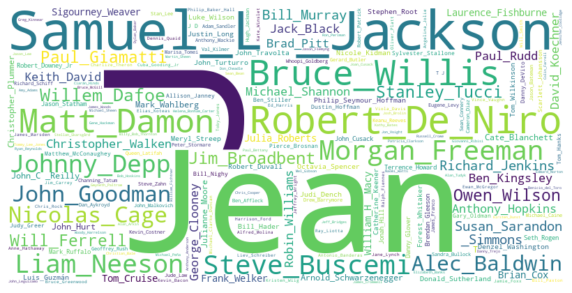

In [51]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all the names into a single string
names_text = ' '.join([name for names in cast_df['name'] for name in names])

# Create a word cloud object
wordcloud = WordCloud(width=800, height=400, 
                      background_color='white').generate(names_text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

By identifying popular actors in successful films, Spectrum can make business decisions about partnering with such actors to enhance the popularity of their productions.